In [ ]:
!pip install plot_keras_history

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 322 kB 28.8 MB/s 
  Created wheel for plot-keras-history: filename=plot_keras_history-1.1.38-py3-none-any.whl size=9472 sha256=d6cfed9401c3ef99aca9ca62122ce824a02b83d1850a4c9a84ae83eabbccc324
  Stored in directory: /root/.cache/pip/wheels/f1/91/1c/bdba9dfd430fdabe38c1077da71de189658be21716be91d184
  Created wheel for sanitize-ml-labels: filename=sanitize_ml_labels-1.0.50-py3-none-any.whl size=320514 sha256=27e9756e763506ccdd3623c1d49baf57bbaf6ae7ec4f757836016eea5c9e89d2
  Stored in directory: /root/.cache/pip/wheels/df/61/fa/0598614d92032edbee232e8a1ee86bba214cc4392a10f11e7e
  Created wheel for support-developer: filename=support_developer-1.0.5-py3-none-any.whl size=5650 sha256=89c28930bc6ab6a72cfd1914a67e5fdda9168aec4ddc6ede41cdeabba6c42294
  Stored in directory: /root/.cache/pip/wheels/e4/d3/9b/d4f296a0183daacaf202d8b69df27edca88326a47da66cd624
 

In [ ]:
import tensorflow as tf
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense,Flatten,MaxPool2D,Conv2D,Activation
from tensorflow.keras import Sequential
from plot_keras_history import show_history, plot_history
import pandas as pd

In [ ]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip 


--2022-11-25 14:37:38--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.12.240, 172.253.62.128, 142.250.188.48, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.12.240|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M   254MB/s    in 0.4s    

2022-11-25 14:37:38 (254 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



In [ ]:
zipref = zipfile.ZipFile('pizza_steak.zip','r')
zipref.extractall()
zipref.close()

In [ ]:
num_steak_images_train = len(os.listdir("pizza_steak/train/steak"))

num_steak_images_train

750

In [ ]:
import pathlib
data_dir = pathlib.Path('pizza_steak/train')
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))

In [ ]:
class_names

array(['pizza', 'steak'], dtype='<U5')

In [ ]:
import matplotlib.image as mpimg
import random

def view_random_image(target_dir,target_class):
  target_folder = target_dir+target_class 
  random_image = random.sample(os.listdir(target_folder),1)
  img = mpimg.imread(target_folder + '/' + random_image[0])  
  plt.imshow(img)
  plt.title(target_class)
  plt.axis('off')
  print(f'Image shape: {img.shape}')
  return img

Image shape: (512, 384, 3)


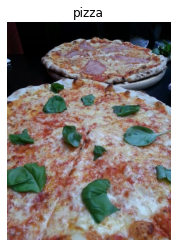

In [ ]:
img = view_random_image('pizza_steak/train/','pizza')


In [ ]:
train_dir = '/content/pizza_steak/train'
test_dir = '/content/pizza_steak/test'

In [ ]:
tf.random.set_seed(42)

train_datagen = ImageDataGenerator(rescale = 1./255)
valid_datagen = ImageDataGenerator(rescale = 1./255)



train_data = train_datagen.flow_from_directory(directory = train_dir,
                                               batch_size = 32,
                                               target_size = (224,224),
                                               class_mode = 'binary',
                                               seed = 42)
valid_data = valid_datagen.flow_from_directory(directory = test_dir,
                                               batch_size = 32,
                                               target_size = (224,224),
                                               class_mode = 'binary',
                                               seed = 42)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [ ]:
model_1 = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(filters=10,
                         kernel_size=3,
                         activation="relu",
                         input_shape=(224, 224, 3)),
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.MaxPool2D(pool_size=2,
                            padding="valid"),
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.MaxPool2D(2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(1, activation="sigmoid")
])

model_1.compile(loss = 'binary_crossentropy',
                optimizer = tf.keras.optimizers.Adam(),
                metrics = 'accuracy')

history_1 = model_1.fit(train_data,
                        epochs = 10,
                        steps_per_epoch = len(train_data),
                        validation_data = valid_data,
                        validation_steps =len(valid_data))


Epoch 1/10
47/47 [==============================] - 25s 335ms/step - loss: 0.5387 - accuracy: 0.7333 - val_loss: 0.4344 - val_accuracy: 0.7840
Epoch 2/10
47/47 [==============================] - 9s 193ms/step - loss: 0.4153 - accuracy: 0.8147 - val_loss: 0.3330 - val_accuracy: 0.8620
Epoch 3/10
47/47 [==============================] - 9s 196ms/step - loss: 0.4076 - accuracy: 0.8187 - val_loss: 0.4117 - val_accuracy: 0.8160
Epoch 4/10
47/47 [==============================] - 9s 194ms/step - loss: 0.3827 - accuracy: 0.8347 - val_loss: 0.3032 - val_accuracy: 0.8840
Epoch 5/10
47/47 [==============================] - 9s 193ms/step - loss: 0.3359 - accuracy: 0.8620 - val_loss: 0.3200 - val_accuracy: 0.8780
Epoch 6/10
47/47 [==============================] - 9s 195ms/step - loss: 0.2965 - accuracy: 0.8747 - val_loss: 0.3748 - val_accuracy: 0.8260
Epoch 7/10
47/47 [==============================] - 10s 208ms/step - loss: 0.2646 - accuracy: 0.8960 - val_loss: 0.3564 - val_accuracy: 0.8520
Epoc

In [ ]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                    

Image shape: (512, 512, 3)
Image shape: (512, 512, 3)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  after removing the cwd from sys.path.


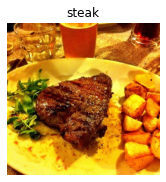

In [ ]:
plt.figure()
plt.subplot(1,2,1)
pizza = view_random_image('pizza_steak/train/', 'pizza')
plt.subplot(1,2,1)
steak = view_random_image('pizza_steak/train/','steak')

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size = (224,224),
                                               batch_size = 32,
                                               class_mode = 'binary',
                                               seed = 42)
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size = (224,224),
                                             batch_size = 32,
                                             class_mode = 'binary',
                                             seed = 42)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [ ]:
model_2 = Sequential([
     Conv2D(filters=10, # filter is the number of sliding windows going across an input (higher = more complex model)
         kernel_size=(3, 3), # the size of the sliding window going across an input
         strides=(1, 1), # the size of the step the sliding window takes across an input 
         padding="valid", # if "same", output shape is same as input shape, if "valid", output shape gets compressed
         activation="relu",
         input_shape=(224, 224, 3)), # input layer (specify input shape)
  Conv2D(10, 3, activation="relu"),
  Conv2D(10, 3, activation="relu"),
  Flatten(),
  Dense(1, activation="sigmoid") # output layer (working with binary classification so only 1 output neuron)                 
])

model_2.compile(optimizer = Adam(),
                loss = 'binary_crossentropy',
                metrics = ['accuracy'])


In [ ]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_5 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 conv2d_6 (Conv2D)           (None, 218, 218, 10)      910       
                                                                 
 flatten_1 (Flatten)         (None, 475240)            0         
                                                                 
 dense_1 (Dense)             (None, 1)                 475241    
                                                                 
Total params: 477,341
Trainable params: 477,341
Non-trainable params: 0
_________________________________________________________________


In [ ]:
len(train_data), len(test_data)

(47, 16)

In [ ]:
history_2 = model_2.fit(train_data,
            epochs = 10,
            steps_per_epoch = len(train_data),
            validation_data = test_data,
            validation_steps = len(test_data))

Epoch 1/10
47/47 [==============================] - 10s 203ms/step - loss: 0.9491 - accuracy: 0.6847 - val_loss: 0.4736 - val_accuracy: 0.7780
Epoch 2/10
47/47 [==============================] - 9s 193ms/step - loss: 0.4344 - accuracy: 0.8173 - val_loss: 0.3867 - val_accuracy: 0.8340
Epoch 3/10
47/47 [==============================] - 9s 193ms/step - loss: 0.3517 - accuracy: 0.8580 - val_loss: 0.4495 - val_accuracy: 0.7820
Epoch 4/10
47/47 [==============================] - 9s 192ms/step - loss: 0.2343 - accuracy: 0.9153 - val_loss: 0.3833 - val_accuracy: 0.8340
Epoch 5/10
47/47 [==============================] - 9s 192ms/step - loss: 0.0949 - accuracy: 0.9740 - val_loss: 0.4225 - val_accuracy: 0.8180
Epoch 6/10
47/47 [==============================] - 9s 190ms/step - loss: 0.0427 - accuracy: 0.9920 - val_loss: 0.5645 - val_accuracy: 0.8280
Epoch 7/10
47/47 [==============================] - 9s 192ms/step - loss: 0.0321 - accuracy: 0.9933 - val_loss: 0.5070 - val_accuracy: 0.8240
Epoch

In [ ]:
def plot_loss_curves(history):
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  plt.plot(epochs,loss, label = 'training loss')
  plt.plot(epochs, val_loss, label = 'validation loss')
  plt.title('loss')
  plt.xlabel('epochs')
  plt.legend() 

  plt.figure()
  plt.plot(epochs,accuracy, label = 'training accuracy')
  plt.plot(epochs,val_accuracy, label = 'val accuracy')
  plt.title('accuracy')
  plt.xlabel('epochs')
  plt.legend()

(<Figure size 1000x500 with 2 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f28d00e2310>,
       dtype=object))

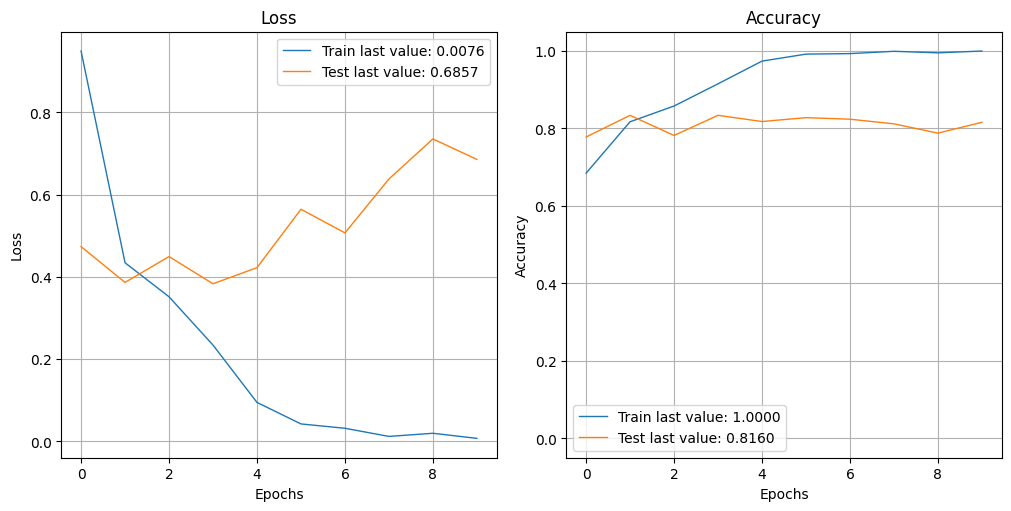

In [ ]:
plot_history(history_2)

In [ ]:
model_3 = Sequential([
    Conv2D(10,3,
           strides = 1,
           padding = 'valid',
           input_shape = (224,224,3),
           activation = 'relu'),
    MaxPool2D(pool_size = 2),
    Conv2D(10,3,activation = 'relu'),
    MaxPool2D(),
    Conv2D(10,3, activation = 'relu'),
    MaxPool2D(),
    Flatten(),
    Dense(1,activation = 'sigmoid')
])

model_3.compile(loss = 'binary_crossentropy',
                optimizer = Adam(),
                metrics = ['accuracy'])


In [ ]:
history_3 = model_3.fit(train_data,
            epochs = 10,
            steps_per_epoch = len(train_data),
            validation_data = test_data,
            validation_steps = len(test_data))

Epoch 1/10
47/47 [==============================] - 10s 192ms/step - loss: 0.6114 - accuracy: 0.6740 - val_loss: 0.4678 - val_accuracy: 0.7700
Epoch 2/10
47/47 [==============================] - 9s 183ms/step - loss: 0.4492 - accuracy: 0.7827 - val_loss: 0.4348 - val_accuracy: 0.7920
Epoch 3/10
47/47 [==============================] - 9s 184ms/step - loss: 0.4151 - accuracy: 0.8120 - val_loss: 0.3378 - val_accuracy: 0.8520
Epoch 4/10
47/47 [==============================] - 9s 183ms/step - loss: 0.3856 - accuracy: 0.8240 - val_loss: 0.3170 - val_accuracy: 0.8920
Epoch 5/10
47/47 [==============================] - 9s 183ms/step - loss: 0.3599 - accuracy: 0.8387 - val_loss: 0.3142 - val_accuracy: 0.8660
Epoch 6/10
47/47 [==============================] - 9s 184ms/step - loss: 0.3840 - accuracy: 0.8367 - val_loss: 0.3292 - val_accuracy: 0.8440
Epoch 7/10
47/47 [==============================] - 9s 184ms/step - loss: 0.3661 - accuracy: 0.8500 - val_loss: 0.3212 - val_accuracy: 0.8760
Epoch

(<Figure size 1000x500 with 2 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f2874353f10>,
       dtype=object))

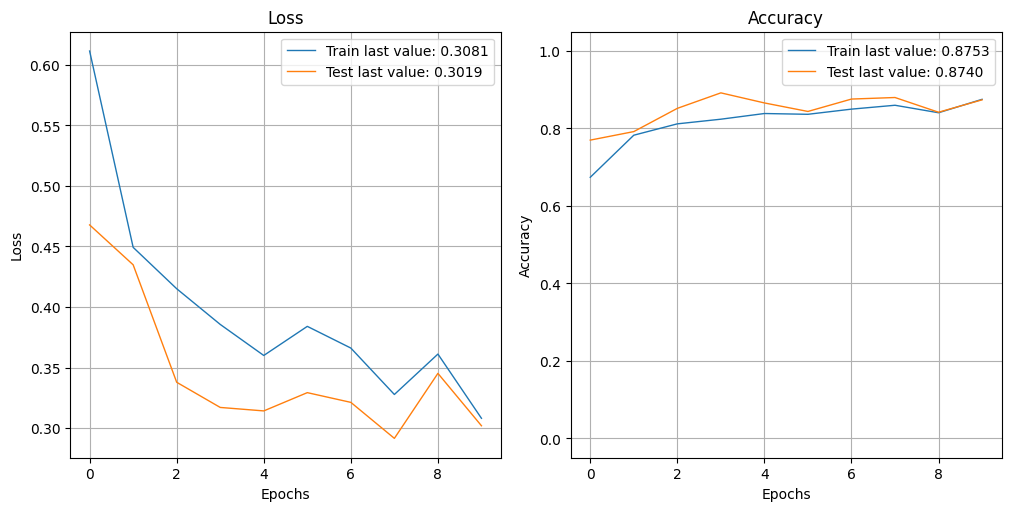

In [ ]:
plot_history(history_3)

In [ ]:
train_datagen_augmented = ImageDataGenerator(rescale = 1/255.,
                                             rotation_range = 0.2,
                                             shear_range = 0.2,
                                             width_shift_range = 0.2,
                                             height_shift_range = 0.3,
                                             horizontal_flip = True)

train_data_aug = train_datagen_augmented.flow_from_directory(train_dir,
                                                             target_size = (224,224),
                                                             batch_size = 32,
                                                             class_mode = 'binary'
                                                             )

Found 1500 images belonging to 2 classes.
